In [1]:
'''
35100004_visualization 
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../dataset/35100004.csv")

# step 1 data wrangling

In [3]:
df.head()

,REF_DATE,GEO,DGUID,Initial entry status,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998/1999,Provinces and territories,2016A000011124,Total correctional services,Number,223,units,0,v32445374,1.1,34547.0,NaN,NaN,NaN,0
1,1998/1999,Provinces and territories,2016A000011124,Pre-trial detention,Number,223,units,0,v32445375,1.2,13547.0,NaN,NaN,NaN,0
2,1998/1999,Provinces and territories,2016A000011124,Secure custody,Number,223,units,0,v32445376,1.3,1638.0,NaN,NaN,NaN,0
3,1998/1999,Provinces and territories,2016A000011124,Custody and supervision (secure),Number,223,units,0,v32445377,1.4,NaN,..,NaN,t,0
4,1998/1999,Provinces and territories,2016A000011124,Young Offenders Act (YOA) (secure),Number,223,units,0,v32445378,1.5,NaN,..,NaN,t,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REF_DATE              1424 non-null   object 
 1   GEO                   1424 non-null   object 
 2   DGUID                 1372 non-null   object 
 3   Initial entry status  1424 non-null   object 
 4   UOM                   1424 non-null   object 
 5   UOM_ID                1424 non-null   int64  
 6   SCALAR_FACTOR         1424 non-null   object 
 7   SCALAR_ID             1424 non-null   int64  
 8   VECTOR                1424 non-null   object 
 9   COORDINATE            1424 non-null   float64
 10  VALUE                 863 non-null    float64
 11  STATUS                561 non-null    object 
 12  SYMBOL                0 non-null      float64
 13  TERMINATED            164 non-null    object 
 14  DECIMALS              1424 non-null   int64  
dtypes: float64(3), int64(

In [110]:
df.describe()

,UOM_ID,SCALAR_ID,COORDINATE,VALUE,SYMBOL,DECIMALS
count,1424.0,1424.0,1424.000000,863.000000,0.0,1424.0
mean,223.0,0.0,8.950449,396.217845,NaN,0.0
std,0.0,0.0,5.050850,1076.720709,NaN,0.0
min,223.0,0.0,1.100000,0.000000,NaN,0.0
25%,223.0,0.0,4.300000,2.000000,NaN,0.0
50%,223.0,0.0,9.000000,16.000000,NaN,0.0
75%,223.0,0.0,13.120000,122.500000,NaN,0.0
max,223.0,0.0,17.900000,13016.000000,NaN,0.0


In [111]:
# replace missing values with 0
df['VALUE'].replace(np.nan,0.0001,inplace=True)

In [112]:
df['VALUE'].iloc[61:73]

61      0.0001
62     14.0000
63    220.0000
64     52.0000
65      0.0001
66      0.0001
67      0.0001
68      0.0001
69      0.0001
70      0.0001
71      0.0001
72      0.0001
Name: VALUE, dtype: float64

# step2 data visualization
Initial entry status

## 1 pie chart: visualize the components of "Total correctional services"
use pie chart to visualize the components of "Total correctional services"<br>
filter1: REF_DATE(ten years, from 2012/2013 to 2021/2022).<br>
filter2: GEO (14 locations)<br>

"Total correctional services" = "Pre-trial detention" + "Secure custody" + "Custody and supervision (secure)" + "Young Offenders Act (YOA) (secure)" + "Open custody" + "Custody and supervision (open)" + "Young Offenders Act (YOA) (open)" + "Total community sentences"
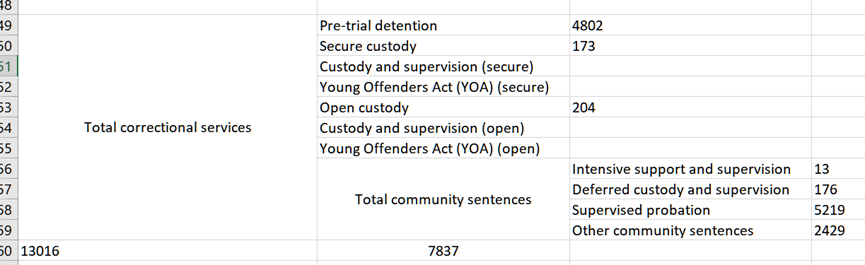


In [113]:
geo_features = df.drop_duplicates(subset=["GEO"],keep='first')["GEO"]
geo_features = geo_features.tolist()
for name in ['Ontario, Ministry of Children and Youth Services (MCYS)','Ontario, Ministry of Community Safety and Correctional Services (MCSCS)']:
    geo_features.remove(name)
geo_features

['Provinces and territories',
 'Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia',
 'Yukon',
 'Northwest Territories',
 'Nunavut']

In [114]:
date_features = df.drop_duplicates(subset=["REF_DATE"],keep='first')["REF_DATE"]
date_features = date_features.tolist()
date_features

['2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [115]:
# # CCS_features
# CCS_features = df.drop_duplicates(subset=['Custodial and community supervision'],keep='first')['Custodial and community supervision']
# # CCS_features = date_features.tolist()
# CCS_features
'''
"Total correctional services" = "Pre-trial detention" + "Secure custody" + "Open custody" + "Total community sentences"
'''

'\n"Total correctional services" = "Pre-trial detention" + "Secure custody" + "Open custody" + "Total community sentences"\n'

In [116]:
def plotCount(geo_features,date_feature):
    # df_geo_all = df[df.REF_DATE=='2020/2021']
    
    # all geos in one year
    df_geo_all = df[df.REF_DATE==date_feature]

    temp_feature1 = df_geo_all[df_geo_all['Initial entry status'] =='Pre-trial detention']
    temp_feature1.rename(columns={'Initial entry status': 'Pre-trial detention'}, inplace=True)
    temp_feature1.reset_index(drop=True, inplace=True)

    temp_feature2 = df_geo_all[df_geo_all['Initial entry status'] =='Secure custody']
    temp_feature2.rename(columns={'Initial entry status': 'Secure custody'}, inplace=True)
    temp_feature2.reset_index(drop=True, inplace=True)

    temp_feature3 = df_geo_all[df_geo_all['Initial entry status'] =='Open custody']
    temp_feature3.rename(columns={'Initial entry status': 'Open custody'}, inplace=True)
    temp_feature3.reset_index(drop=True, inplace=True)

    temp_feature4 = df_geo_all[df_geo_all['Initial entry status'] =='Total community sentences']
    temp_feature4.rename(columns={'Initial entry status': 'Total community sentences'}, inplace=True)
    temp_feature4.reset_index(drop=True, inplace=True)

    # temp_feature2 = df_geo_all[df_geo_all['Custodial and community supervision'] =='Sentenced open custody, actual-in count']
    # temp_feature2.rename(columns={'Custodial and community supervision': 'Sentenced open custody'}, inplace=True)
    # temp_feature2.reset_index(drop=True, inplace=True)

    # CCSperson_feature3 = df_geo_all[df_geo_all['Custodial and community supervision'] =='Pre-trial detention and other temporary detention, actual-in count']
    # CCSperson_feature3.rename(columns={'Custodial and community supervision': 'Pre-trial detention and other temporary detention'}, inplace=True)
    # CCSperson_feature3.reset_index(drop=True, inplace=True)

    CCSperson_features = pd.DataFrame({'GEO':temp_feature1['GEO'],'Pre-trial detention':temp_feature1['VALUE'],'Open custody':temp_feature3['VALUE'],'Total community sentences':temp_feature4['VALUE'],'Secure custody':temp_feature2['VALUE']})

    CCSperson_features.index = CCSperson_features['GEO']
    df_CCSperson_features = CCSperson_features.T
    df_CCSperson_features.drop('GEO',inplace=True)
    print(df_CCSperson_features)
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            # 同时显示数值和占比的饼图
            return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
        return my_autopct
    labels = df_CCSperson_features.index.tolist()
    for i,feature in enumerate(geo_features):

        values = df_CCSperson_features[feature].tolist()
        if values < [0.1,0.1,0.1,0.1]:
            print('--------------------------------------------------------')
            print(str(i+1) +" No data of "+feature+'!')
            print(values)
            print('--------------------------------------------------------')

            continue
        plt.figure(figsize=(5, 3))
        plt.pie(values,labels=labels,autopct=make_autopct(values),radius=2)
        plt.title(str(i+1) + ' Components of Total Actual-in Count: '+ feature,x=0.5,y=1.5)
        plt.show()

In [117]:
[0,0,0] <[0.1,0.1,0.1]

True

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          4802.0                       7.0   
Open custody                                  204.0                       6.0   
Total community sentences                    7837.0                     148.0   
Secure custody                                173.0                       1.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       19.0      0.0001         112.0   
Open custody                              18.0      0.0001           7.0   
Total community sentences               0.0001      0.0001         286.0   
Secure custody                             5.0      0.0001           2.0   

GEO                        Quebec Ontario  \
Pre-trial detention        0.0001  2127.0   
Open custody               0.0001    44.0   
Total community sentences  0.0001  3594.0   
Secure custody             0.0001

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


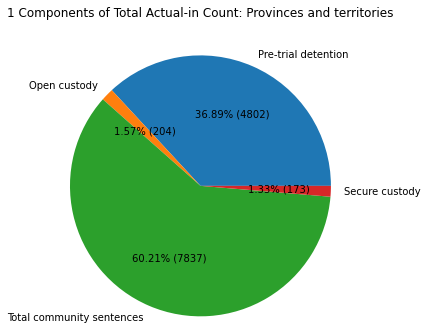

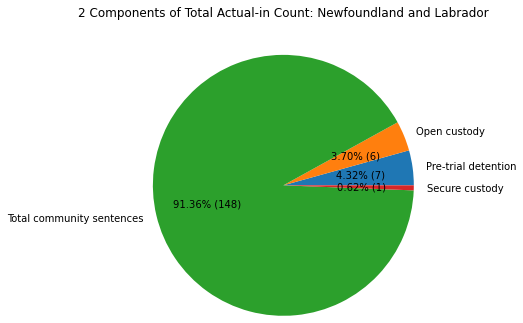

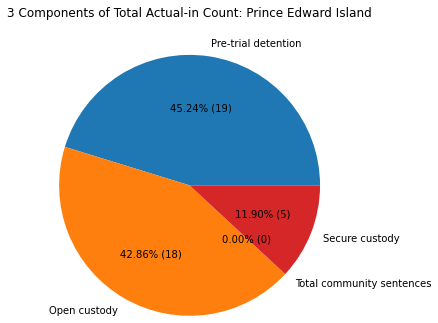

--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


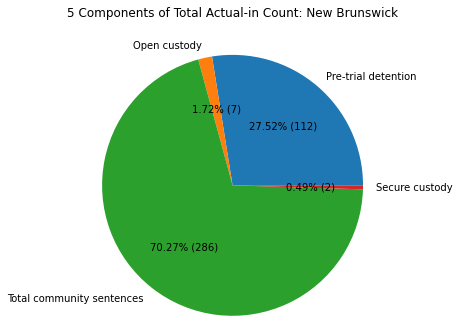

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


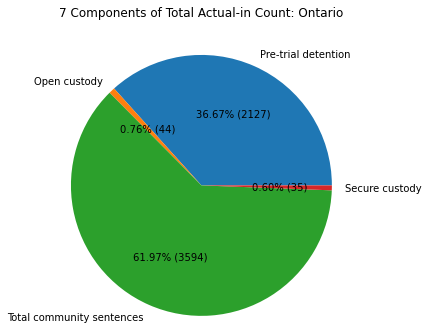

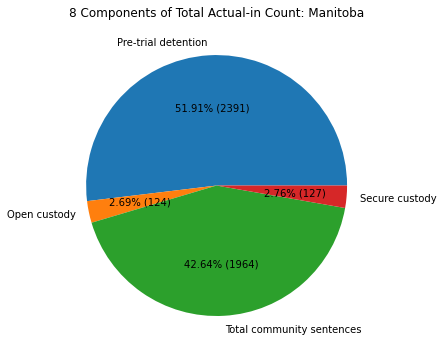

--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


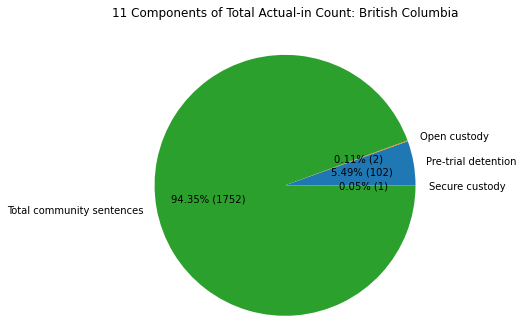

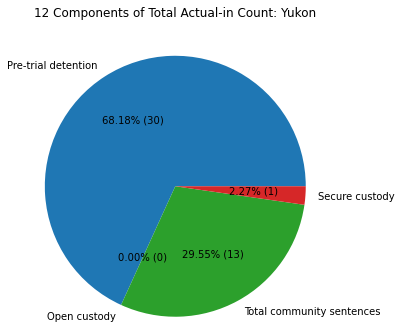

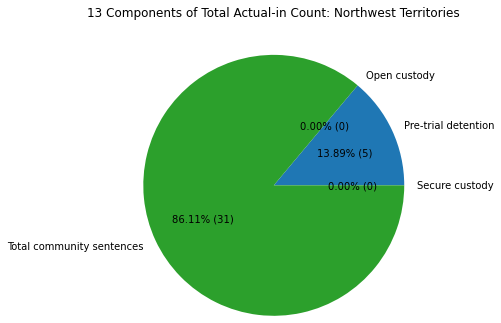

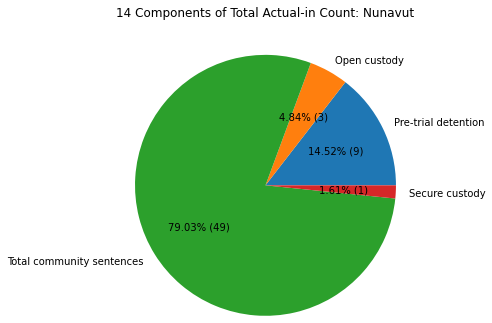

In [118]:
'''
2012/2013, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2012/2013'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          1738.0                       7.0   
Open custody                                   60.0                       4.0   
Total community sentences                    4688.0                     123.0   
Secure custody                                 44.0                       2.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       17.0      0.0001         102.0   
Open custody                              14.0      0.0001           2.0   
Total community sentences               0.0001      0.0001         271.0   
Secure custody                            10.0      0.0001           3.0   

GEO                        Quebec Ontario  \
Pre-trial detention        0.0001  1487.0   
Open custody               0.0001    34.0   
Total community sentences  0.0001  2694.0   
Secure custody             0.0001

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


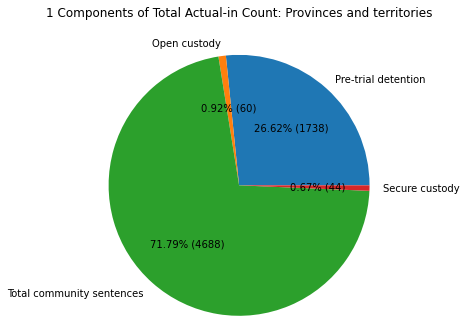

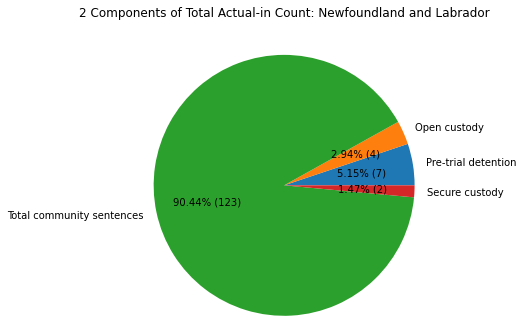

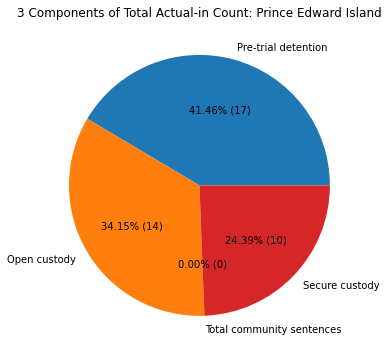

--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


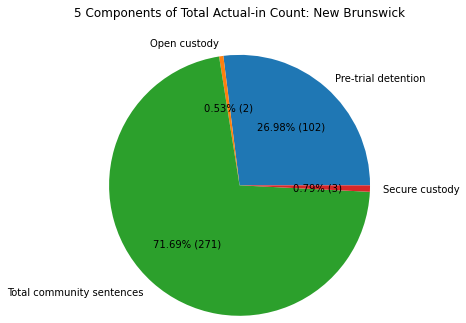

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


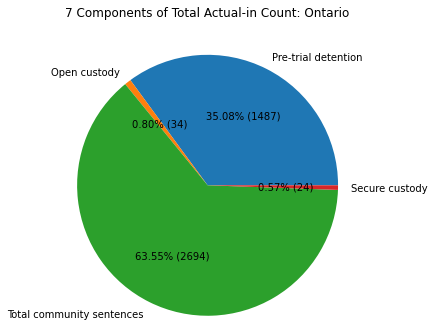

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


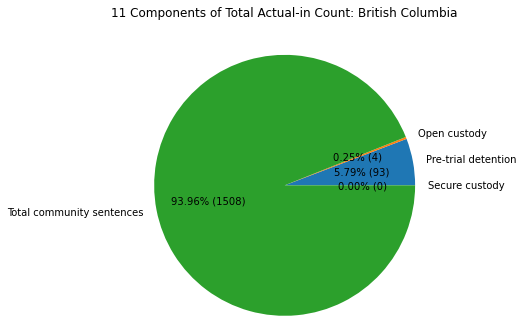

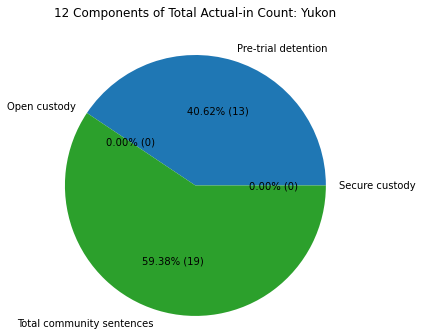

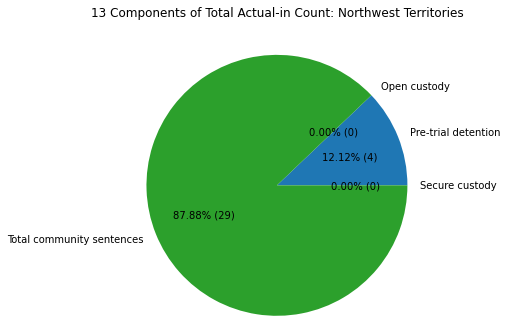

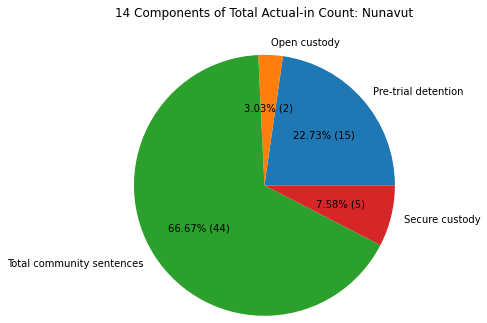

In [119]:
'''
2013/2014, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2013/2014'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          1707.0                       8.0   
Open custody                                   53.0                       0.0   
Total community sentences                    3782.0                      99.0   
Secure custody                                 41.0                       3.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       19.0      0.0001         116.0   
Open custody                              14.0      0.0001           3.0   
Total community sentences               0.0001      0.0001         198.0   
Secure custody                            12.0      0.0001           2.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001  1457.0   0.0001       0.0001  0.0001   
Open custody               0.0001    30.0   0.0001       0.0001

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


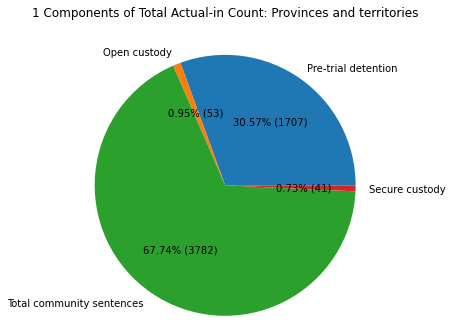

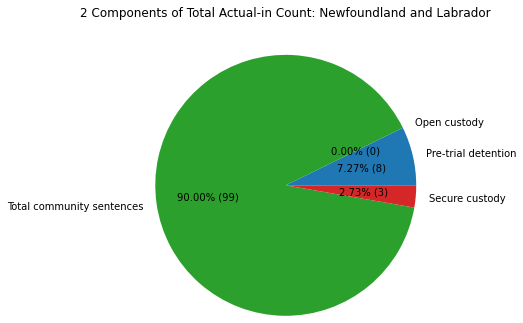

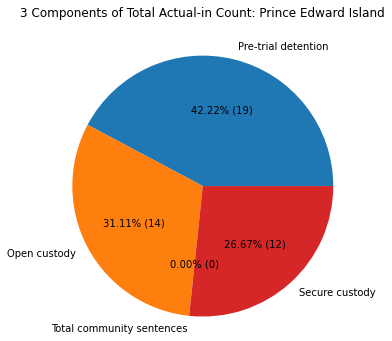

--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


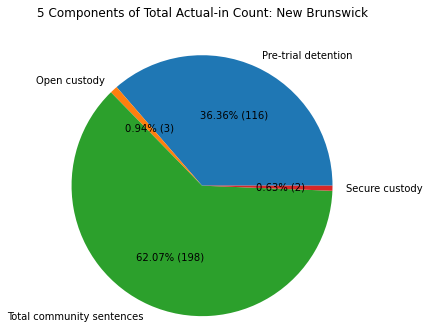

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


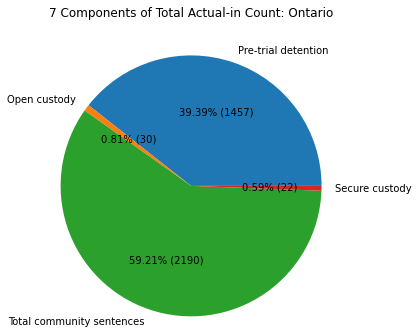

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


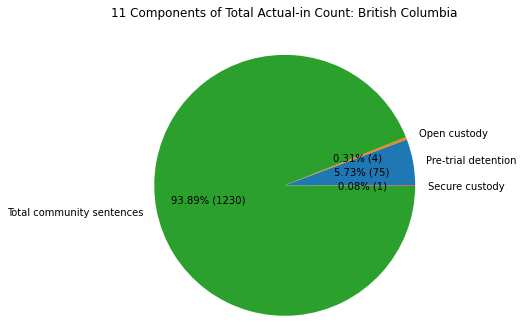

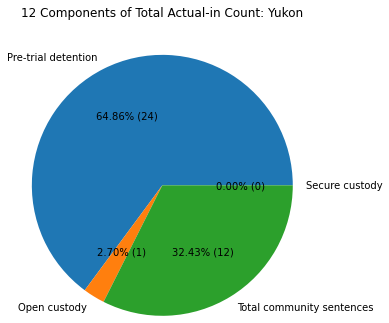

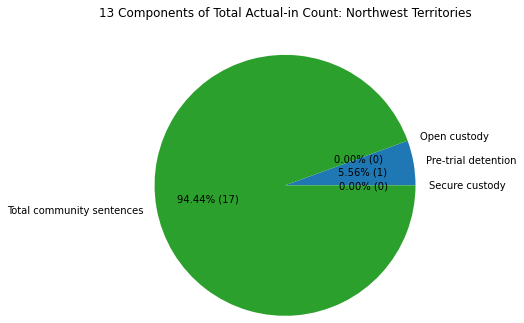

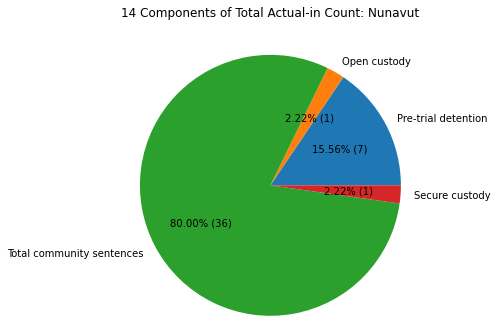

In [120]:
'''
2014/2015, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2014/2015'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          1581.0                       6.0   
Open custody                                   58.0                       0.0   
Total community sentences                    3447.0                     108.0   
Secure custody                                 41.0                       2.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       19.0      0.0001         110.0   
Open custody                              18.0      0.0001           1.0   
Total community sentences               0.0001      0.0001         196.0   
Secure custody                            13.0      0.0001           2.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001  1325.0   0.0001       0.0001  0.0001   
Open custody               0.0001    32.0   0.0001       0.0001

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


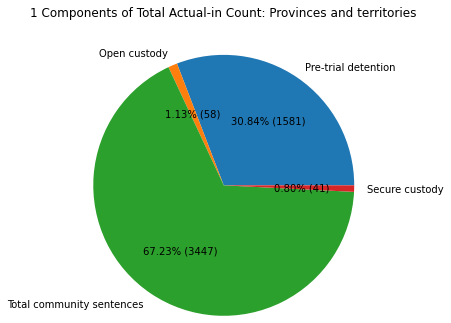

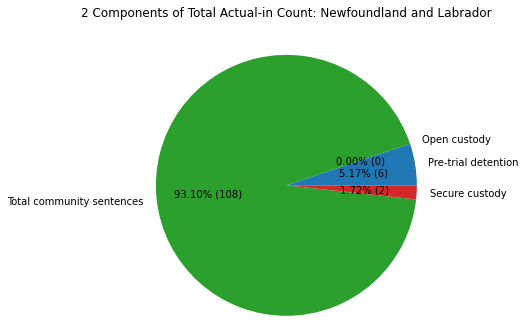

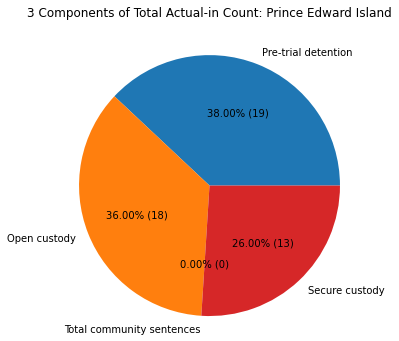

--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


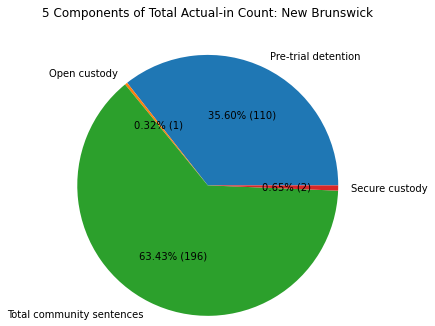

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


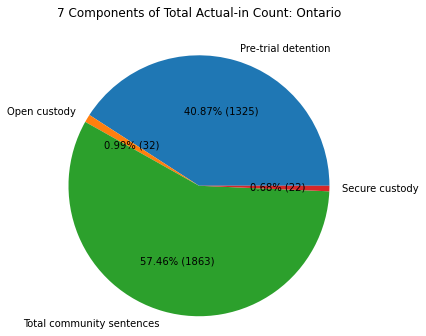

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


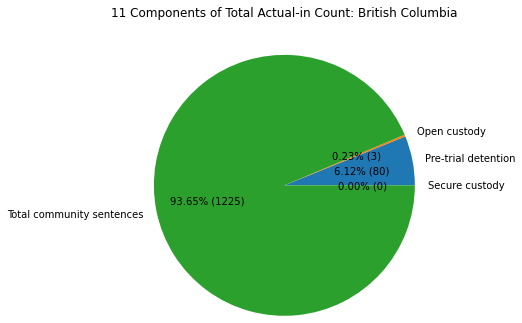

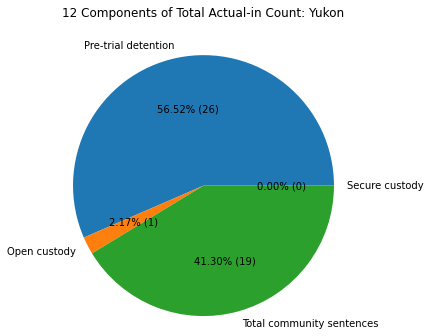

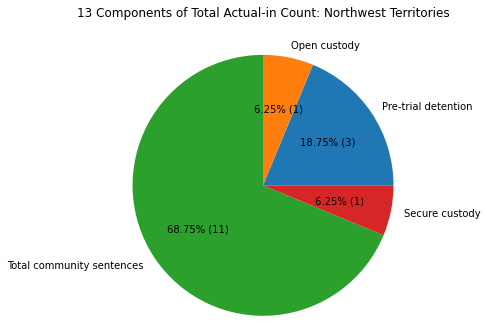

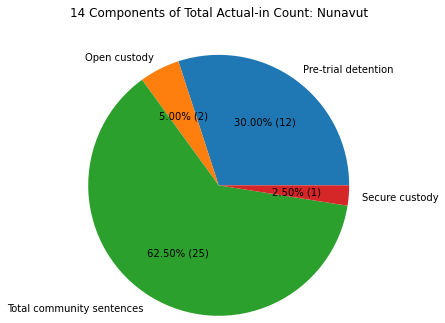

In [121]:
'''
2015/2016, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2015/2016'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          1852.0                      10.0   
Open custody                                   44.0                       0.0   
Total community sentences                    4034.0                      96.0   
Secure custody                                 35.0                       3.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       18.0      0.0001          71.0   
Open custody                               6.0      0.0001           0.0   
Total community sentences                  0.0      0.0001         152.0   
Secure custody                             4.0      0.0001           0.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001  1315.0   0.0001        330.0  0.0001   
Open custody               0.0001    22.0   0.0001         13.0

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


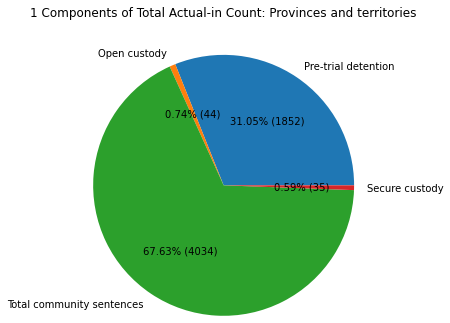

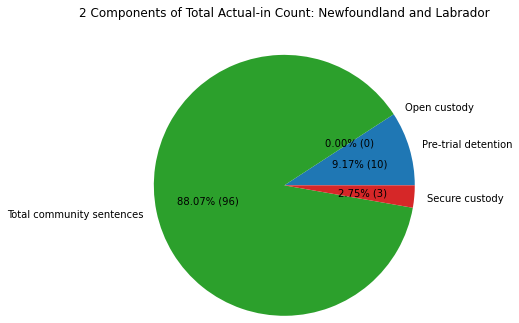

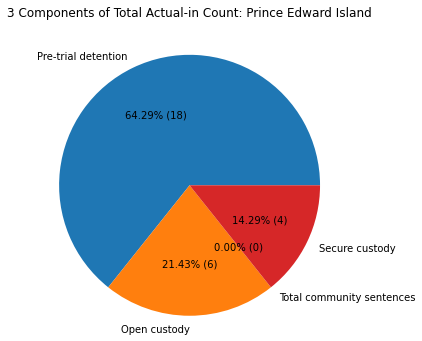

--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


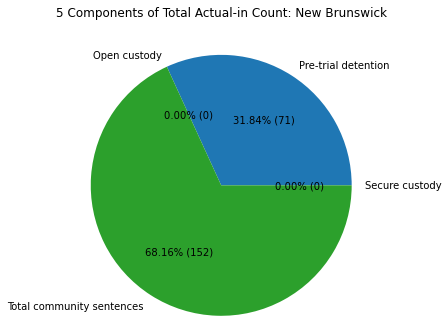

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


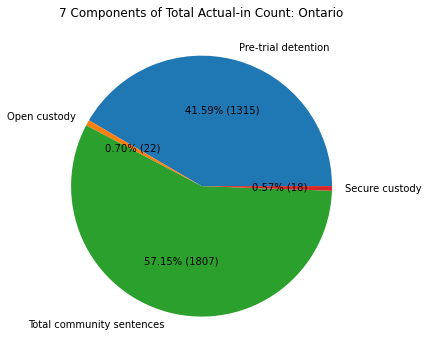

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


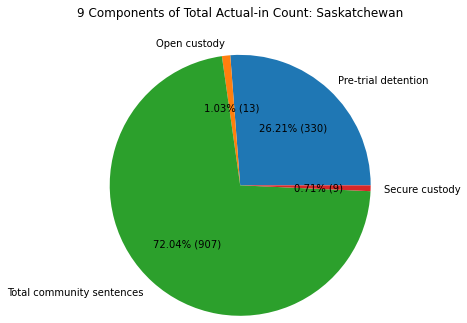

--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


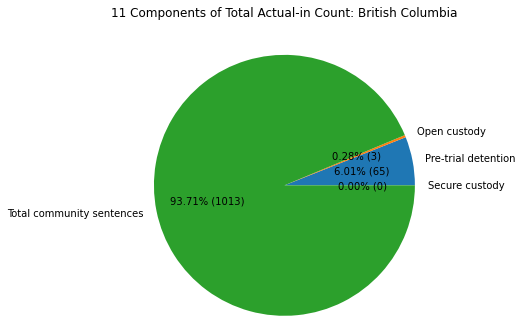

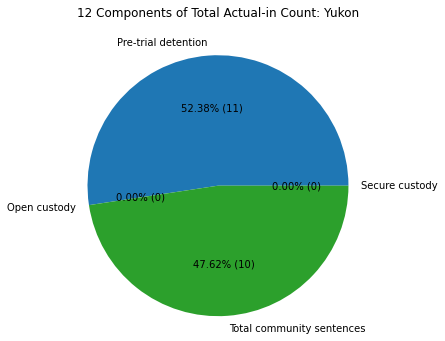

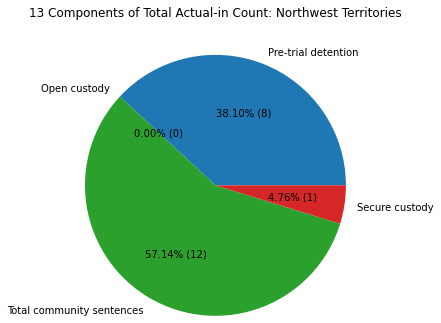

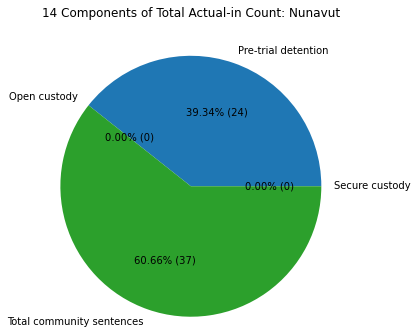

In [122]:
'''
2016/2017, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2016/2017'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          1697.0                       9.0   
Open custody                                   38.0                       2.0   
Total community sentences                    4126.0                     143.0   
Secure custody                                 41.0                       2.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       16.0        91.0          85.0   
Open custody                               0.0         0.0           0.0   
Total community sentences                  0.0       145.0         144.0   
Secure custody                             1.0        10.0           0.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001  1124.0   0.0001        299.0  0.0001   
Open custody               0.0001    20.0   0.0001          8.0

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


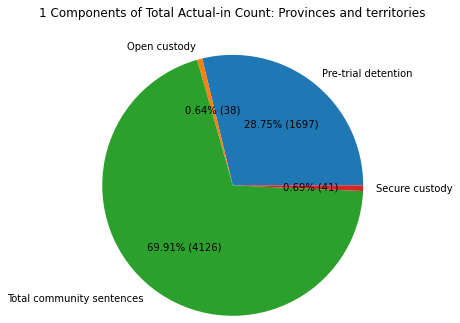

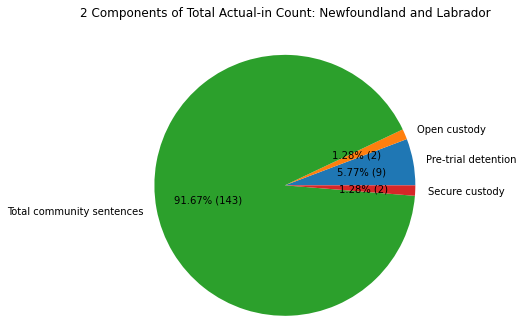

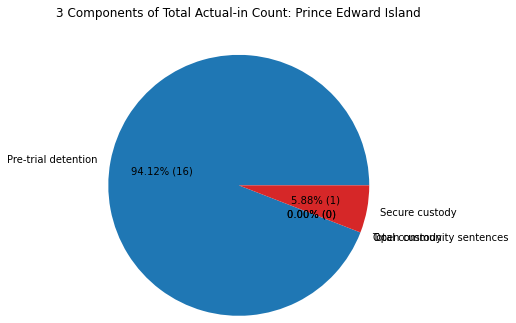

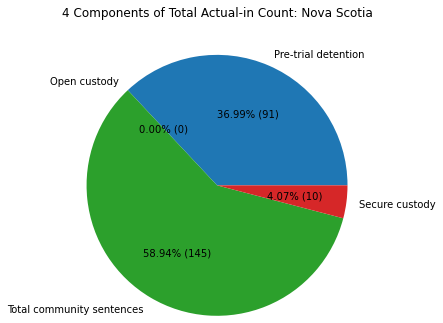

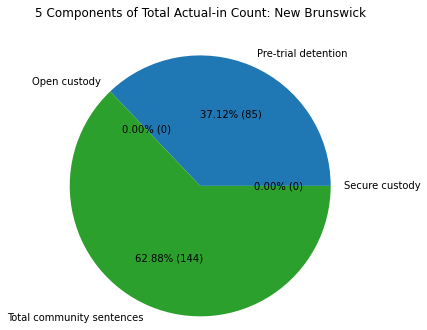

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


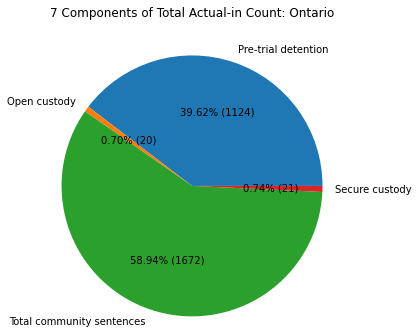

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


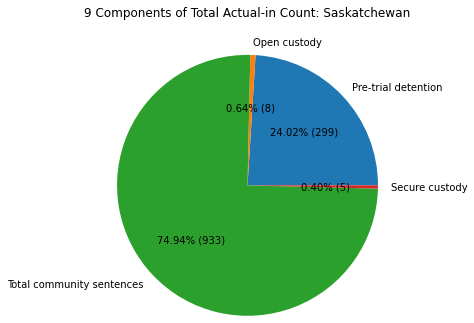

--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


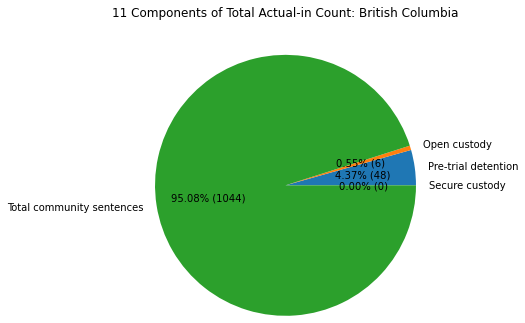

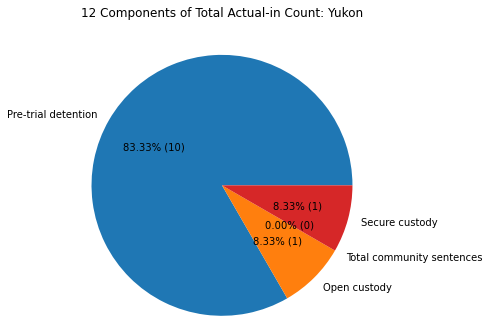

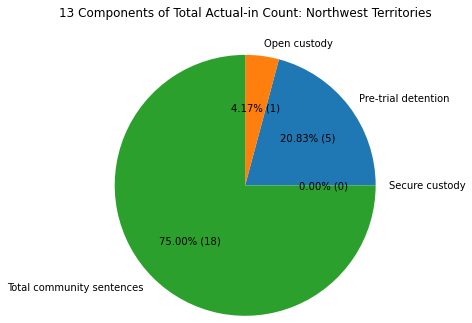

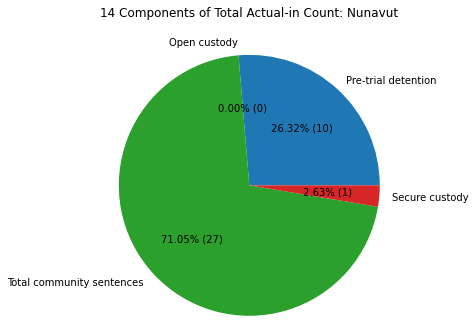

In [123]:
'''
2017/2018, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2017/2018'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          1379.0                      26.0   
Open custody                                   40.0                       0.0   
Total community sentences                    3730.0                     108.0   
Secure custody                                 29.0                       1.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       10.0        83.0          70.0   
Open custody                               5.0         0.0           2.0   
Total community sentences                  0.0       113.0         139.0   
Secure custody                             2.0         4.0           1.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001   914.0   0.0001        213.0  0.0001   
Open custody               0.0001    28.0   0.0001          5.0

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


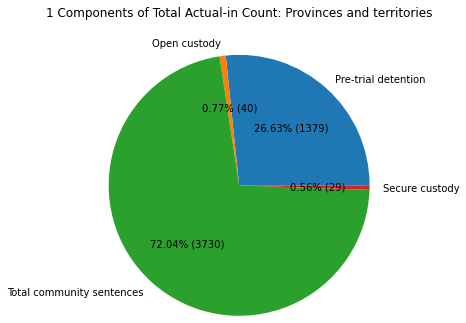

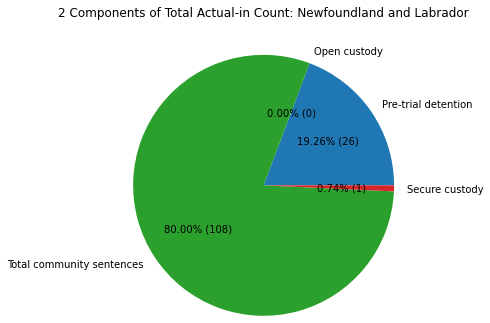

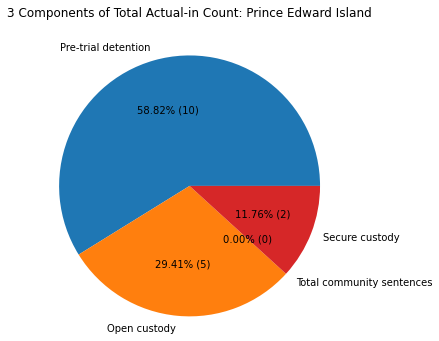

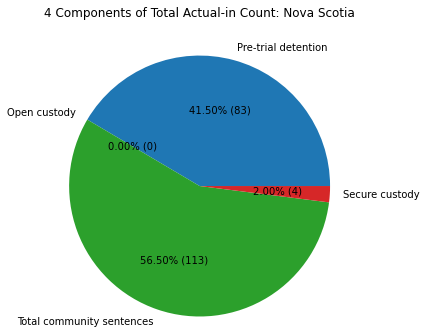

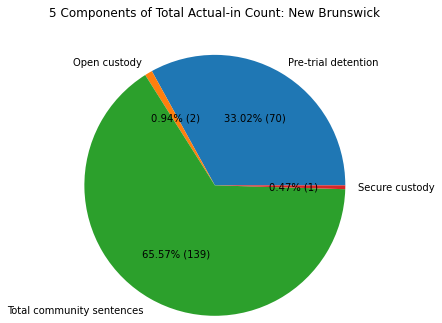

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


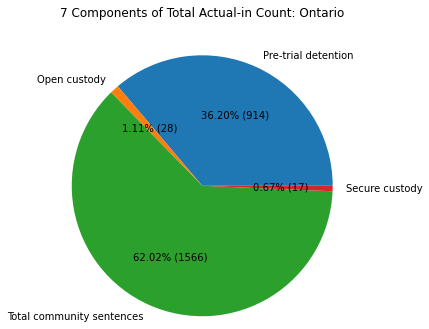

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


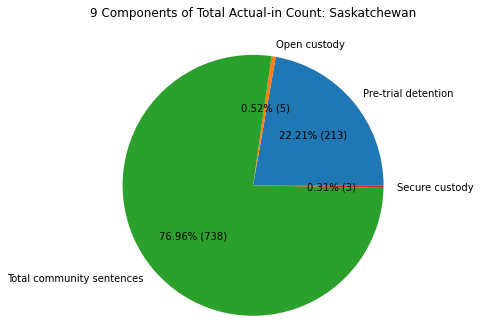

--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


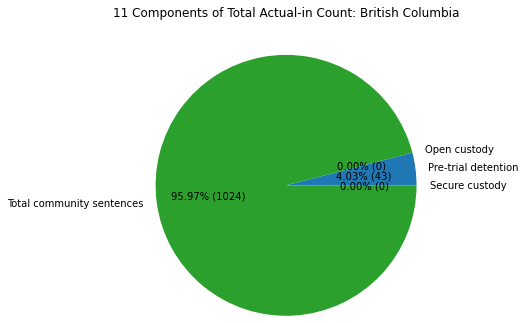

--------------------------------------------------------
12 No data of Yukon!
[0.0, 0.0, 0.0, 0.0]
--------------------------------------------------------


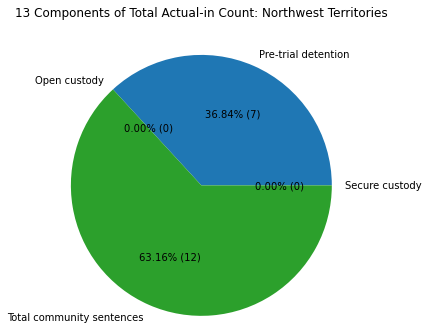

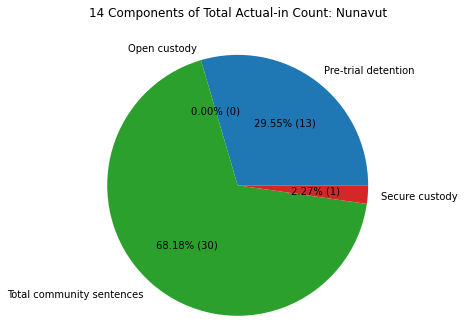

In [124]:
'''
2018/2019, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2018/2019'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                          1332.0                      12.0   
Open custody                                   47.0                       0.0   
Total community sentences                    5597.0                     122.0   
Secure custody                                 63.0                       2.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                       10.0        38.0          40.0   
Open custody                               3.0         0.0           2.0   
Total community sentences                  0.0       101.0         121.0   
Secure custody                             1.0         5.0           3.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001   871.0   0.0001        215.0    96.0   
Open custody               0.0001    27.0   0.0001          5.0

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


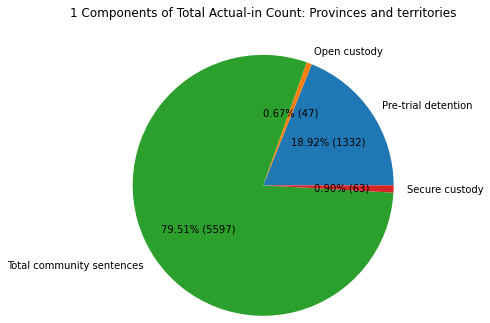

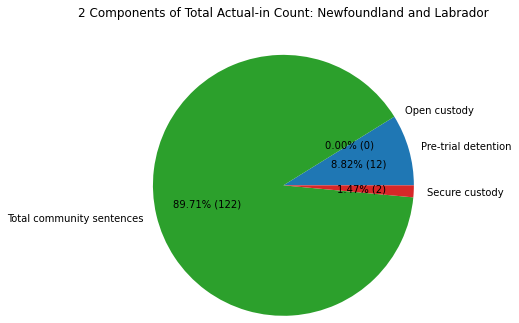

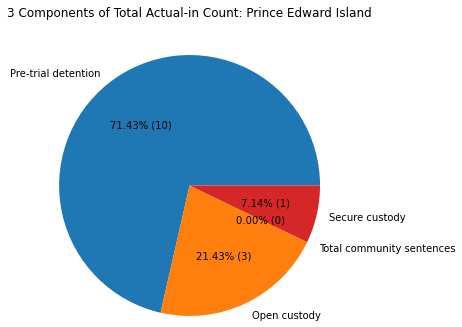

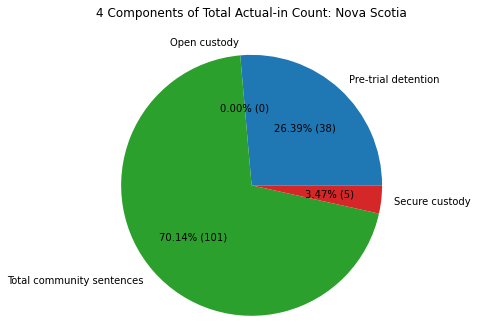

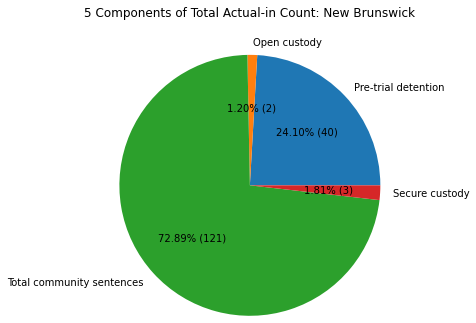

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


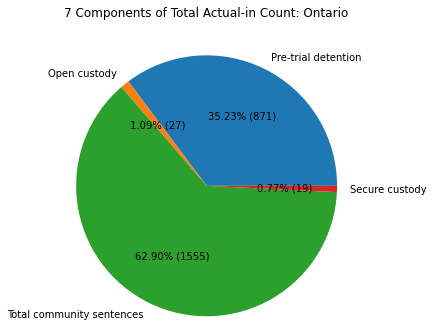

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


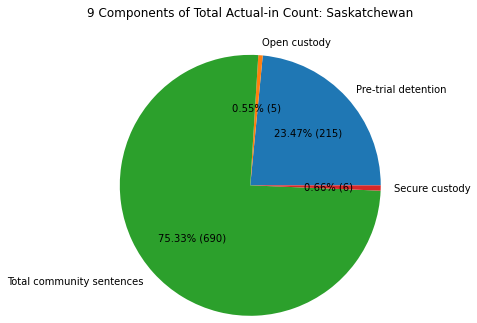

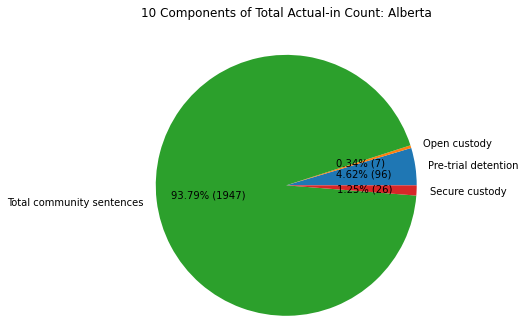

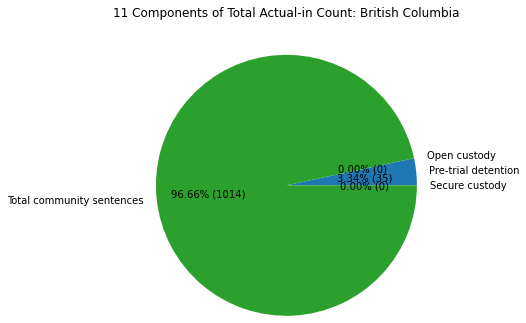

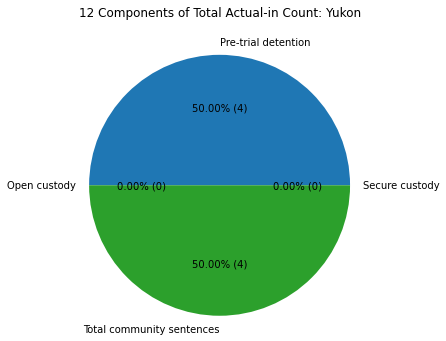

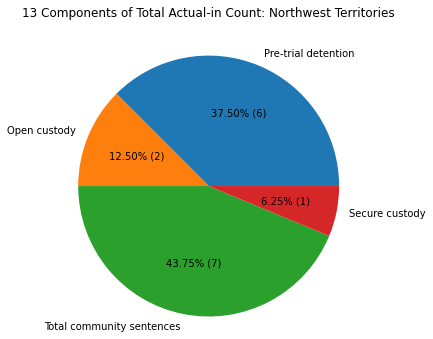

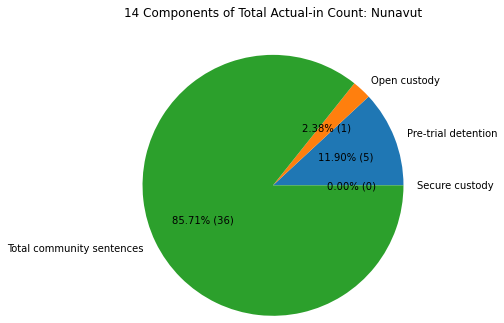

In [125]:
'''
2019/2020, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2019/2020'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                           794.0                      12.0   
Open custody                                   14.0                       0.0   
Total community sentences                    3398.0                      75.0   
Secure custody                                 18.0                       1.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                        4.0        23.0          33.0   
Open custody                               1.0         0.0           0.0   
Total community sentences                  0.0        64.0          97.0   
Secure custody                             0.0         0.0           1.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001   535.0   0.0001        125.0    38.0   
Open custody               0.0001     7.0   0.0001          5.0

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


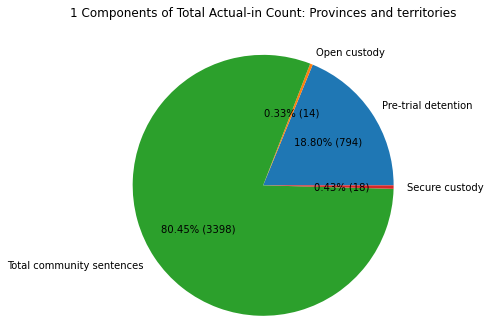

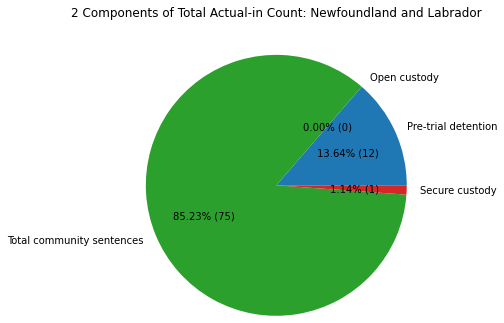

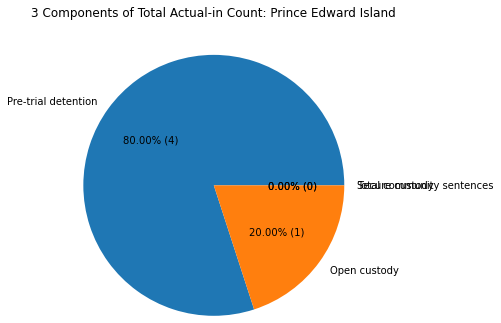

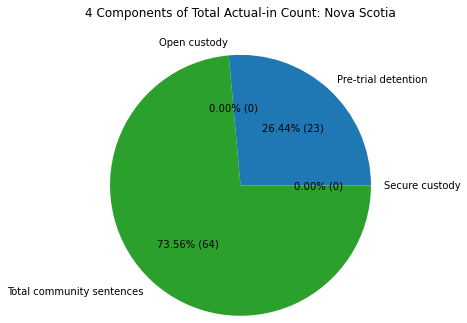

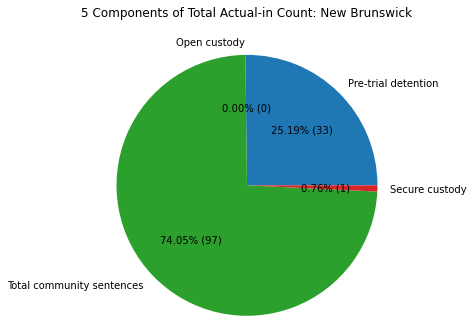

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


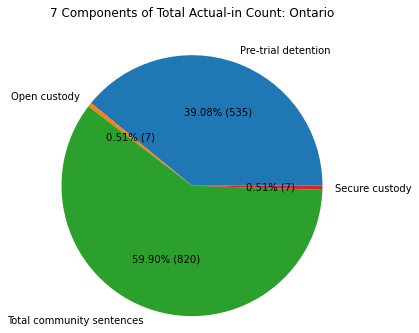

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


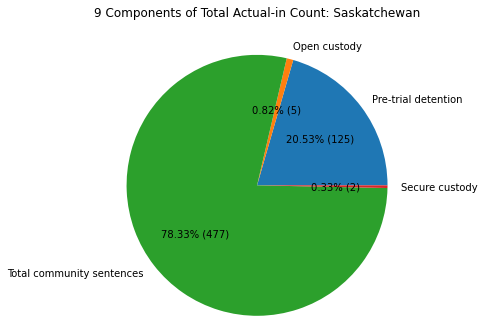

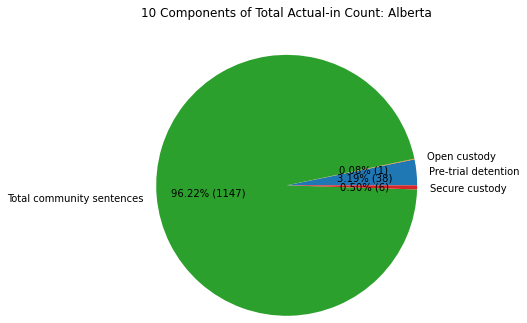

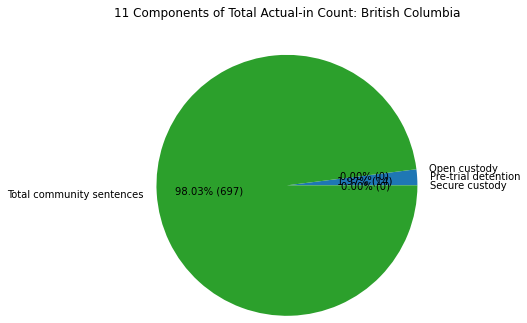

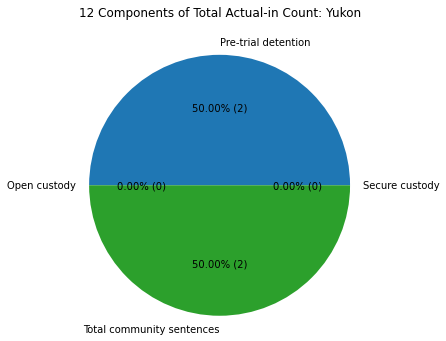

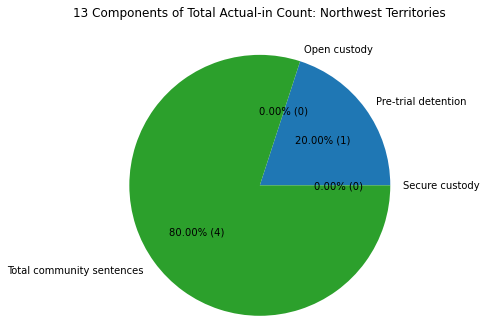

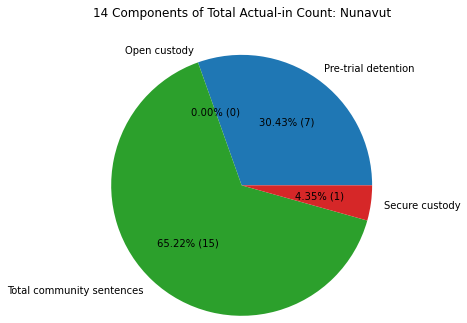

In [126]:
'''
2020/2021, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2020/2021'
plotCount(geo_features,date_feature)

GEO                       Provinces and territories Newfoundland and Labrador  \
Pre-trial detention                           843.0                       4.0   
Open custody                                   23.0                       0.0   
Total community sentences                    3797.0                      70.0   
Secure custody                                 39.0                       2.0   

GEO                       Prince Edward Island Nova Scotia New Brunswick  \
Pre-trial detention                        2.0        30.0          31.0   
Open custody                               0.0         0.0           2.0   
Total community sentences                  0.0        68.0          55.0   
Secure custody                             3.0         2.0           2.0   

GEO                        Quebec Ontario Manitoba Saskatchewan Alberta  \
Pre-trial detention        0.0001   548.0   0.0001        138.0    65.0   
Open custody               0.0001    10.0   0.0001          5.0

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


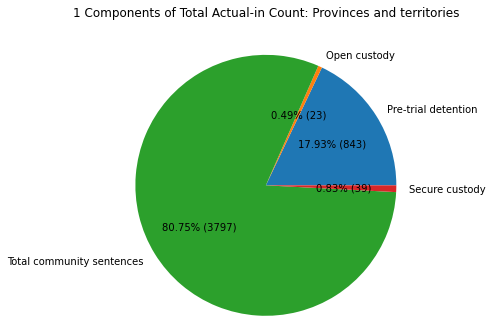

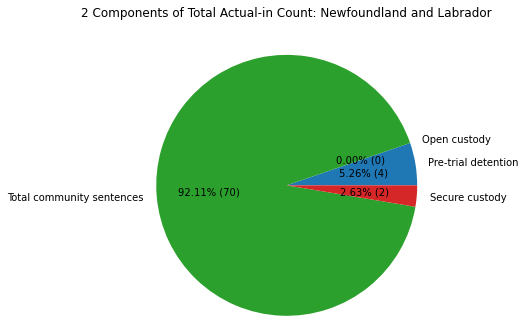

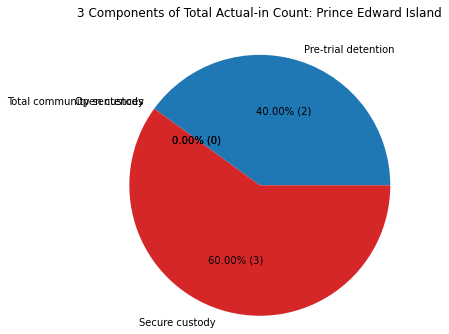

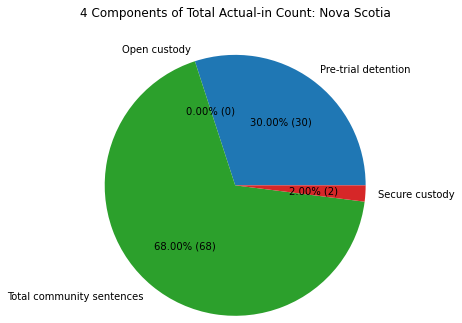

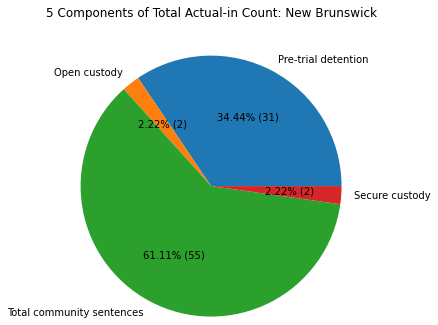

--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


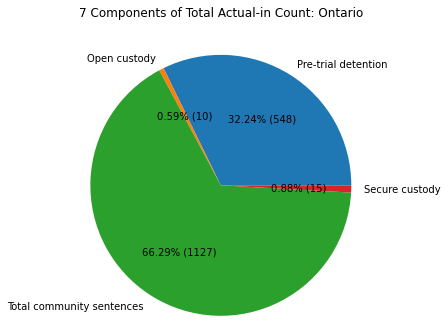

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


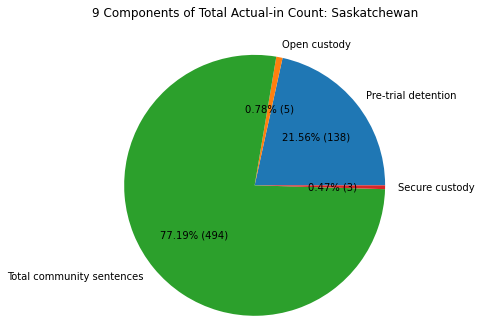

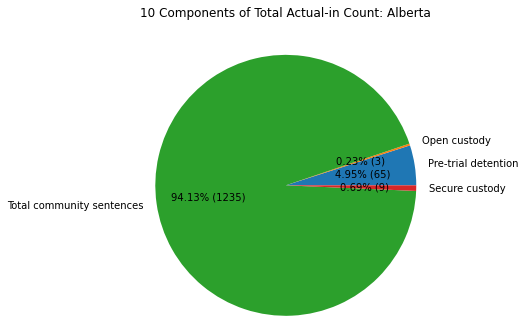

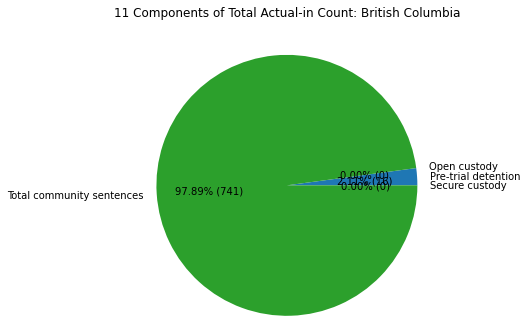

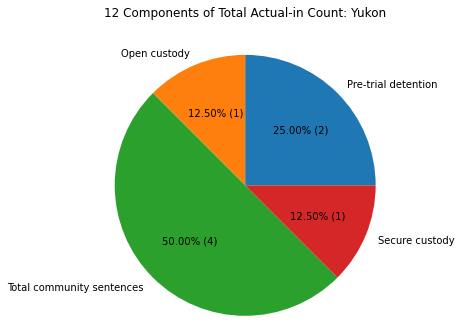

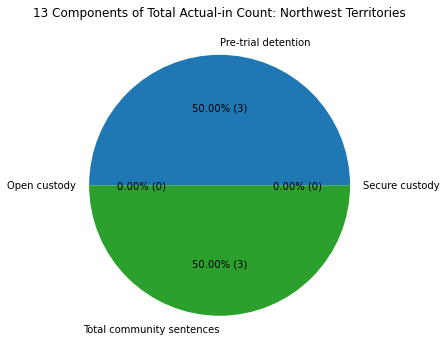

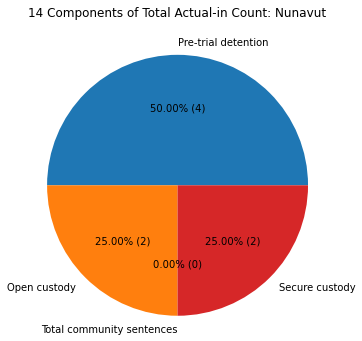

In [127]:
'''
2021/2022, all geo, use pie to visualize the components of "Total correctional services"
'''
date_feature = '2021/2022'
plotCount(geo_features,date_feature)

## 2 pie chart: visualize the components of "Total community sentences"
use pie chart to visualize the components of "Total community sentences"<br>
filter1: REF_DATE(ten years, from 2012/2013 to 2021/2022).<br>
filter2: GEO (14 locations)<br>

"Total community sentences" = "Intensive support and supervision" + "Deferred custody and supervision" + "Supervised probation" + "Other community sentences"
![image.png](attachment:image.png)

In [128]:
def plotCount(geo_features,date_feature):
    # df_geo_all = df[df.REF_DATE=='2020/2021']
    
    # all geos in one year
    df_geo_all = df[df.REF_DATE==date_feature]

    temp_feature1 = df_geo_all[df_geo_all['Initial entry status'] =='Intensive support and supervision']
    temp_feature1.rename(columns={'Initial entry status': 'Intensive support and supervision'}, inplace=True)
    temp_feature1.reset_index(drop=True, inplace=True)

    temp_feature2 = df_geo_all[df_geo_all['Initial entry status'] =='Deferred custody and supervision']
    temp_feature2.rename(columns={'Initial entry status': 'Deferred custody and supervision'}, inplace=True)
    temp_feature2.reset_index(drop=True, inplace=True)

    temp_feature3 = df_geo_all[df_geo_all['Initial entry status'] =='Supervised probation']
    temp_feature3.rename(columns={'Initial entry status': 'Supervised probation'}, inplace=True)
    temp_feature3.reset_index(drop=True, inplace=True)

    temp_feature4 = df_geo_all[df_geo_all['Initial entry status'] =='Other community sentences']
    temp_feature4.rename(columns={'Initial entry status': 'Other community sentences'}, inplace=True)
    temp_feature4.reset_index(drop=True, inplace=True)

    # temp_feature2 = df_geo_all[df_geo_all['Custodial and community supervision'] =='Sentenced open custody, actual-in count']
    # temp_feature2.rename(columns={'Custodial and community supervision': 'Sentenced open custody'}, inplace=True)
    # temp_feature2.reset_index(drop=True, inplace=True)

    # CCSperson_feature3 = df_geo_all[df_geo_all['Custodial and community supervision'] =='Pre-trial detention and other temporary detention, actual-in count']
    # CCSperson_feature3.rename(columns={'Custodial and community supervision': 'Pre-trial detention and other temporary detention'}, inplace=True)
    # CCSperson_feature3.reset_index(drop=True, inplace=True)

    CCSperson_features = pd.DataFrame({'GEO':temp_feature1['GEO'],'Intensive support and supervision':temp_feature1['VALUE'],'Supervised probation':temp_feature3['VALUE'],'Deferred custody and supervision':temp_feature2['VALUE'],'Other community sentences':temp_feature4['VALUE']})

    CCSperson_features.index = CCSperson_features['GEO']
    df_CCSperson_features = CCSperson_features.T
    df_CCSperson_features.drop('GEO',inplace=True)
    print(df_CCSperson_features)
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            # 同时显示数值和占比的饼图
            return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
        return my_autopct
    labels = df_CCSperson_features.index.tolist()
    for i,feature in enumerate(geo_features):

        values = df_CCSperson_features[feature].tolist()
        if values < [0.1,0.1,0.1,0.1]:
            print('--------------------------------------------------------')
            print(str(i+1) +" No data of "+feature+'!')
            print(values)
            print('--------------------------------------------------------')

            continue
        plt.figure(figsize=(5, 3))
        plt.pie(values,labels=labels,autopct=make_autopct(values),radius=2)
        plt.title(str(i+1) + ' Components of Total Actual-in Count: '+ feature,x=0.5,y=1.5)
        plt.show()

GEO                               Provinces and territories  \
Intensive support and supervision                      13.0   
Supervised probation                                 5219.0   
Deferred custody and supervision                      176.0   
Other community sentences                            2429.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                  143.0   
Deferred custody and supervision                        0.0   
Other community sentences                               5.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001      0.0001   
Supervised probation                            0.0001      0.0001   
Deferred custody and supervision                0.0001      0.0001   
Other community sentences                       0.0001      0.0001   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


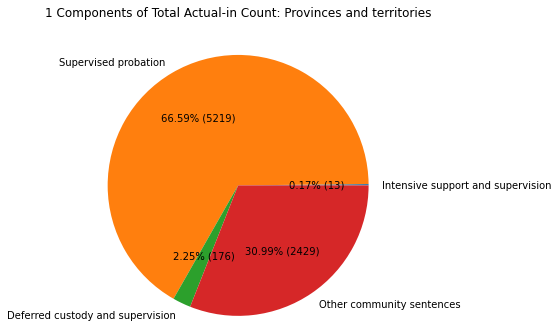

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 143.0, 0.0, 5.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 220.0, 14.0, 52.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


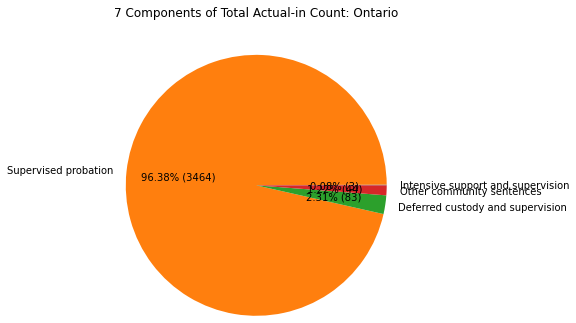

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 957.0, 73.0, 934.0]
--------------------------------------------------------
--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


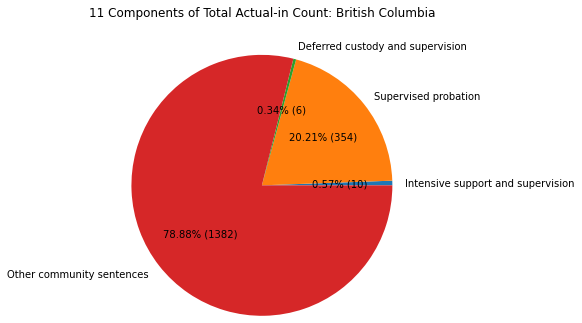

--------------------------------------------------------
12 No data of Yukon!
[0.0, 9.0, 0.0, 4.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 31.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 41.0, 0.0001, 8.0]
--------------------------------------------------------


In [129]:
'''
2012/2013, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2012/2013'
plotCount(geo_features,date_feature)

GEO                               Provinces and territories  \
Intensive support and supervision                      17.0   
Supervised probation                                 3334.0   
Deferred custody and supervision                       75.0   
Other community sentences                            1262.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                  117.0   
Deferred custody and supervision                        2.0   
Other community sentences                               4.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001      0.0001   
Supervised probation                            0.0001      0.0001   
Deferred custody and supervision                0.0001      0.0001   
Other community sentences                       0.0001      0.0001   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


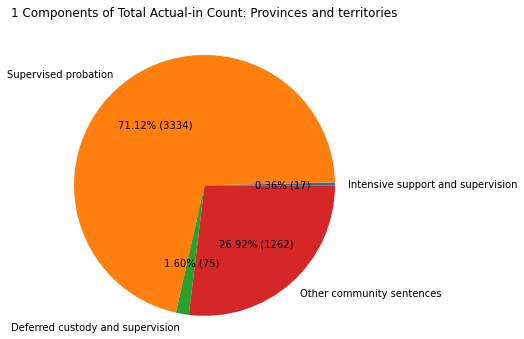

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 117.0, 2.0, 4.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 216.0, 12.0, 43.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


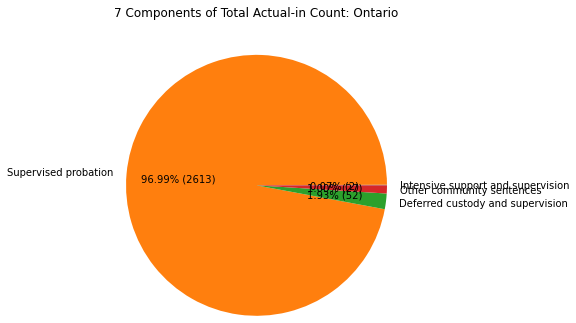

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


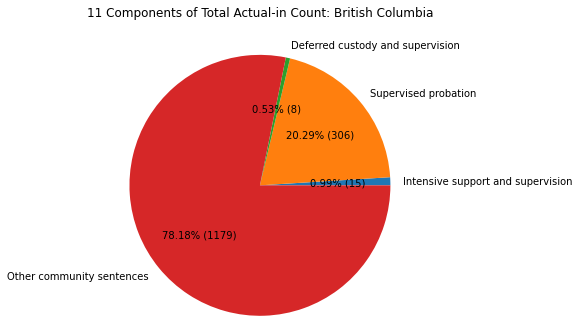

--------------------------------------------------------
12 No data of Yukon!
[0.0, 11.0, 1.0, 7.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 29.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 42.0, 0.0001, 2.0]
--------------------------------------------------------


In [130]:
'''
2013/2014, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2013/2014'
plotCount(geo_features,date_feature)

GEO                               Provinces and territories  \
Intensive support and supervision                      19.0   
Supervised probation                                 2625.0   
Deferred custody and supervision                       70.0   
Other community sentences                            1068.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                   90.0   
Deferred custody and supervision                        2.0   
Other community sentences                               7.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001      0.0001   
Supervised probation                            0.0001      0.0001   
Deferred custody and supervision                0.0001      0.0001   
Other community sentences                       0.0001      0.0001   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


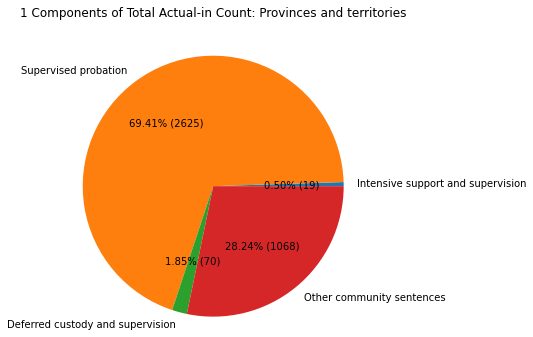

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 90.0, 2.0, 7.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 156.0, 9.0, 33.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
7 No data of Ontario!
[0.0, 2115.0, 53.0, 22.0]
---------------------------

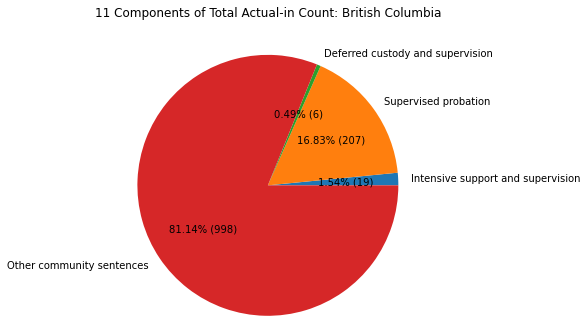

--------------------------------------------------------
12 No data of Yukon!
[0.0, 8.0, 0.0, 4.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 17.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 32.0, 0.0001, 4.0]
--------------------------------------------------------


In [131]:
'''
2014/2015, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2014/2015'
plotCount(geo_features,date_feature)

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


GEO                               Provinces and territories  \
Intensive support and supervision                      21.0   
Supervised probation                                 2318.0   
Deferred custody and supervision                       48.0   
Other community sentences                            1060.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                  105.0   
Deferred custody and supervision                        1.0   
Other community sentences                               2.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001      0.0001   
Supervised probation                            0.0001      0.0001   
Deferred custody and supervision                0.0001      0.0001   
Other community sentences                       0.0001      0.0001   

GEO              

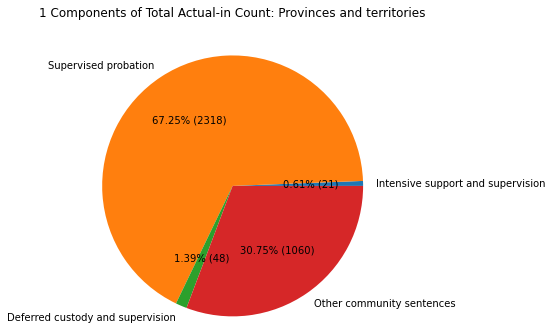

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 105.0, 1.0, 2.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 146.0, 8.0, 42.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


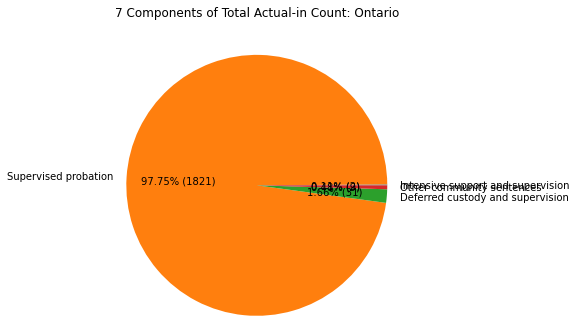

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


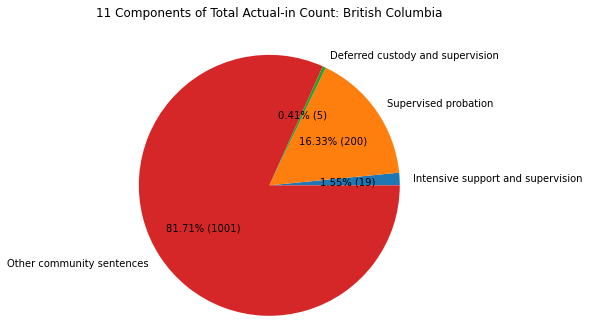

--------------------------------------------------------
12 No data of Yukon!
[0.0, 16.0, 0.0, 3.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 8.0, 3.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 22.0, 0.0001, 3.0]
--------------------------------------------------------


In [132]:
'''
2015/2016, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2015/2016'
plotCount(geo_features,date_feature)

GEO                               Provinces and territories  \
Intensive support and supervision                      19.0   
Supervised probation                                 2771.0   
Deferred custody and supervision                       78.0   
Other community sentences                            1166.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                   87.0   
Deferred custody and supervision                        2.0   
Other community sentences                               7.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001      0.0001   
Supervised probation                               0.0      0.0001   
Deferred custody and supervision                0.0001      0.0001   
Other community sentences                          0.0      0.0001   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


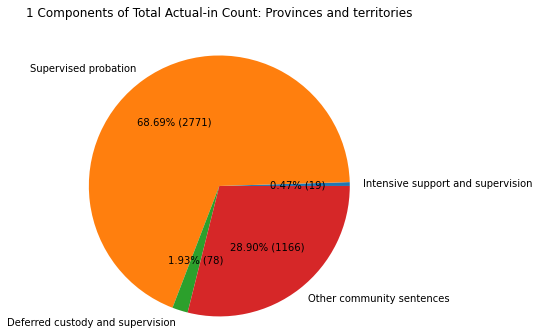

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 87.0, 2.0, 7.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0, 0.0001, 0.0]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 111.0, 9.0, 32.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
7 No data of Ontario!
[0.0, 1765.0, 32.0, 10.0]
---------------------------------

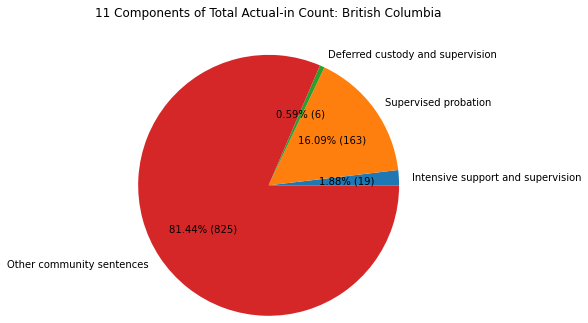

--------------------------------------------------------
12 No data of Yukon!
[0.0, 3.0, 2.0, 5.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 12.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 35.0, 0.0001, 2.0]
--------------------------------------------------------


In [133]:
'''
2016/2017, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2016/2017'
plotCount(geo_features,date_feature)

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


GEO                               Provinces and territories  \
Intensive support and supervision                      27.0   
Supervised probation                                 2777.0   
Deferred custody and supervision                      103.0   
Other community sentences                            1219.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                  138.0   
Deferred custody and supervision                        2.0   
Other community sentences                               3.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001         0.0   
Supervised probation                               0.0       135.0   
Deferred custody and supervision                0.0001        10.0   
Other community sentences                          0.0         0.0   

GEO              

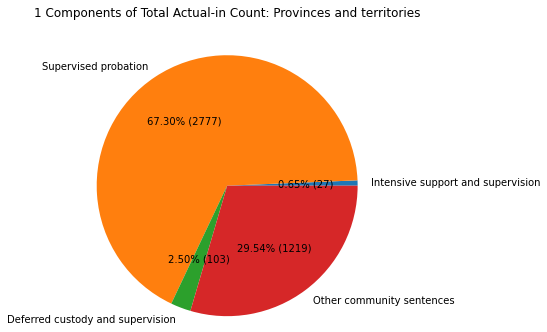

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 138.0, 2.0, 3.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0, 0.0001, 0.0]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0, 135.0, 10.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 120.0, 12.0, 12.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


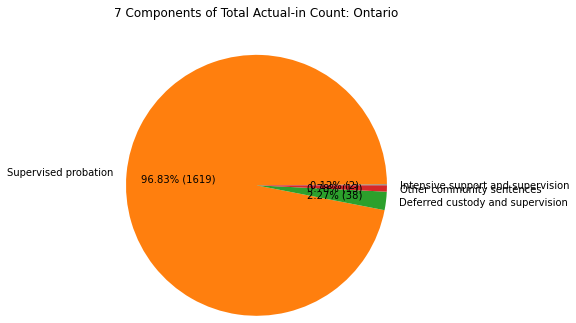

--------------------------------------------------------
8 No data of Manitoba!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
9 No data of Saskatchewan!
[0.0001, 576.0, 32.0, 325.0]
--------------------------------------------------------
--------------------------------------------------------
10 No data of Alberta!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


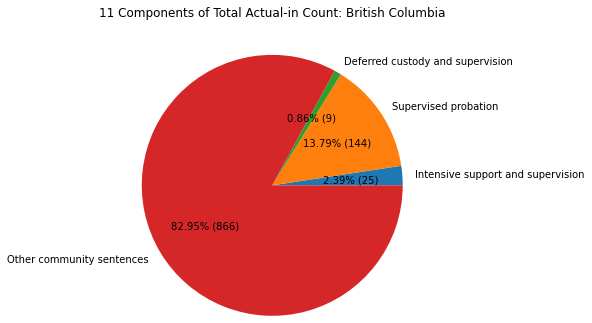

--------------------------------------------------------
12 No data of Yukon!
[0.0, 0.0, 0.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 18.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 27.0, 0.0001, 0.0]
--------------------------------------------------------


In [134]:
'''
2017/2018, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2017/2018'
plotCount(geo_features,date_feature)

GEO                               Provinces and territories  \
Intensive support and supervision                      23.0   
Supervised probation                                 2438.0   
Deferred custody and supervision                       80.0   
Other community sentences                            1189.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                   98.0   
Deferred custody and supervision                        1.0   
Other community sentences                               9.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001         0.0   
Supervised probation                               0.0       102.0   
Deferred custody and supervision                0.0001        11.0   
Other community sentences                          0.0         0.0   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


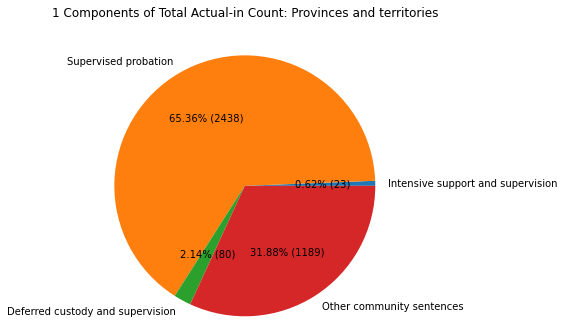

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 98.0, 1.0, 9.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0, 0.0001, 0.0]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0, 102.0, 11.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 124.0, 2.0, 13.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
7 No data of Ontario!
[0.0, 1507.0, 49.0, 10.0]
------------------------------------------

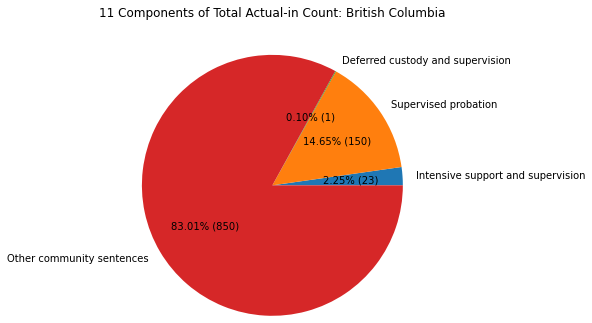

--------------------------------------------------------
12 No data of Yukon!
[0.0, 0.0, 0.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 12.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 29.0, 0.0001, 1.0]
--------------------------------------------------------


In [135]:
'''
2018/2019, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2018/2019'
plotCount(geo_features,date_feature)

GEO                               Provinces and territories  \
Intensive support and supervision                      20.0   
Supervised probation                                 2946.0   
Deferred custody and supervision                      129.0   
Other community sentences                            2502.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                  106.0   
Deferred custody and supervision                       11.0   
Other community sentences                               5.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001         0.0   
Supervised probation                               0.0        92.0   
Deferred custody and supervision                0.0001         9.0   
Other community sentences                          0.0         0.0   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


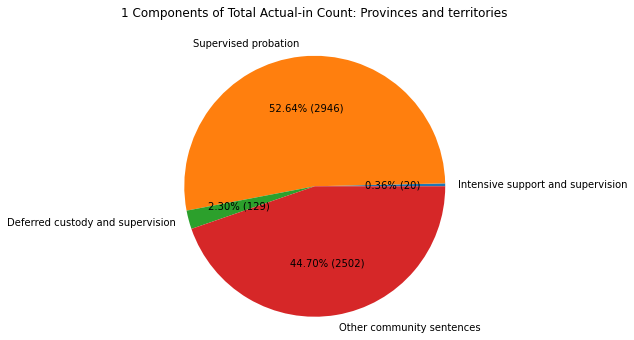

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 106.0, 11.0, 5.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0, 0.0001, 0.0]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0, 92.0, 9.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 92.0, 5.0, 24.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
7 No data of Ontario!
[0.0, 1495.0, 54.0, 6.0]
--------------------------------------------

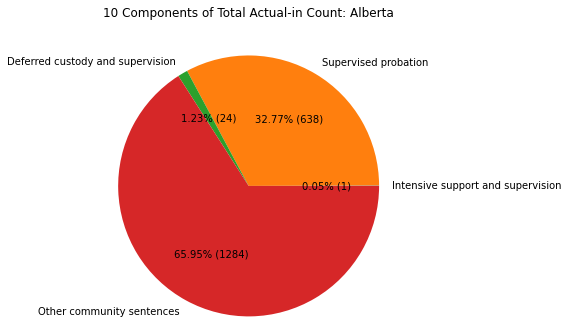

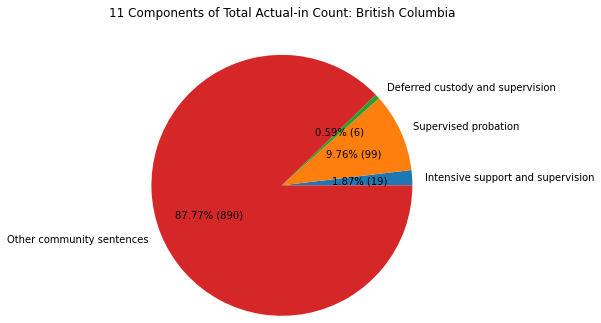

--------------------------------------------------------
12 No data of Yukon!
[0.0, 0.0, 4.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 7.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 30.0, 0.0001, 6.0]
--------------------------------------------------------


In [136]:
'''
2019/2020, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2019/2020'
plotCount(geo_features,date_feature)

GEO                               Provinces and territories  \
Intensive support and supervision                      17.0   
Supervised probation                                 1884.0   
Deferred custody and supervision                       69.0   
Other community sentences                            1428.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                   66.0   
Deferred custody and supervision                        3.0   
Other community sentences                               6.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001         0.0   
Supervised probation                               0.0        57.0   
Deferred custody and supervision                0.0001         7.0   
Other community sentences                          0.0         0.0   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


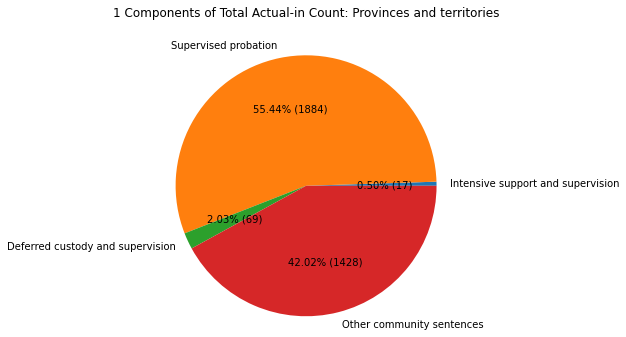

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 66.0, 3.0, 6.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0, 0.0001, 0.0]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0, 57.0, 7.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 80.0, 5.0, 12.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
7 No data of Ontario!
[0.0, 786.0, 28.0, 6.0]
-----------------------------------------------

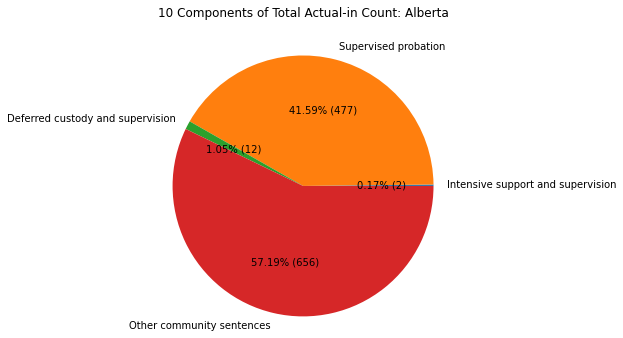

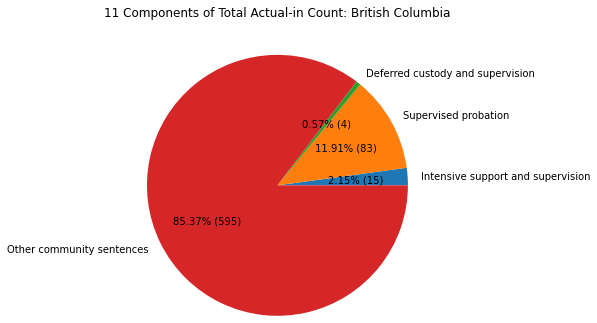

--------------------------------------------------------
12 No data of Yukon!
[0.0, 0.0, 2.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 4.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 7.0, 0.0001, 8.0]
--------------------------------------------------------


In [137]:
'''
2020/2021, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2020/2021'
plotCount(geo_features,date_feature)

GEO                               Provinces and territories  \
Intensive support and supervision                      11.0   
Supervised probation                                 2119.0   
Deferred custody and supervision                      106.0   
Other community sentences                            1561.0   

GEO                               Newfoundland and Labrador  \
Intensive support and supervision                       0.0   
Supervised probation                                   62.0   
Deferred custody and supervision                        2.0   
Other community sentences                               6.0   

GEO                               Prince Edward Island Nova Scotia  \
Intensive support and supervision               0.0001         0.0   
Supervised probation                               0.0        63.0   
Deferred custody and supervision                0.0001         5.0   
Other community sentences                          0.0         0.0   

GEO              

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


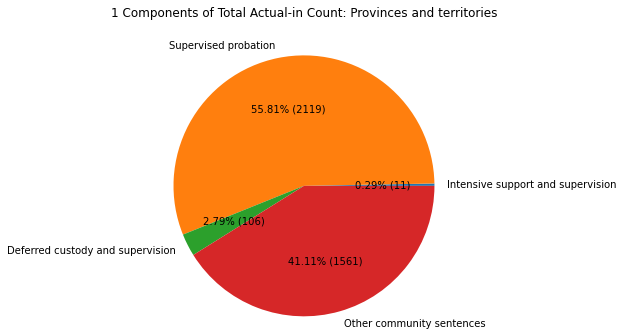

--------------------------------------------------------
2 No data of Newfoundland and Labrador!
[0.0, 62.0, 2.0, 6.0]
--------------------------------------------------------
--------------------------------------------------------
3 No data of Prince Edward Island!
[0.0001, 0.0, 0.0001, 0.0]
--------------------------------------------------------
--------------------------------------------------------
4 No data of Nova Scotia!
[0.0, 63.0, 5.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
5 No data of New Brunswick!
[0.0001, 41.0, 1.0, 13.0]
--------------------------------------------------------
--------------------------------------------------------
6 No data of Quebec!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
7 No data of Ontario!
[0.0, 1061.0, 64.0, 2.0]
----------------------------------------------

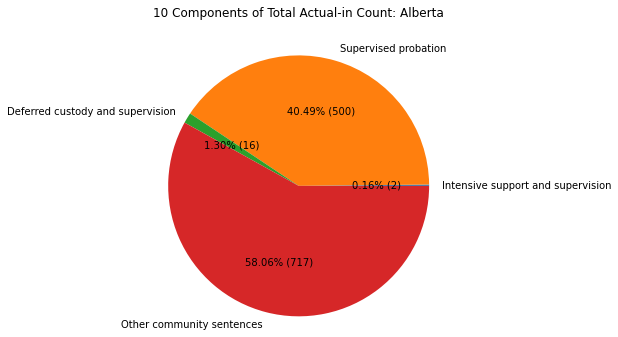

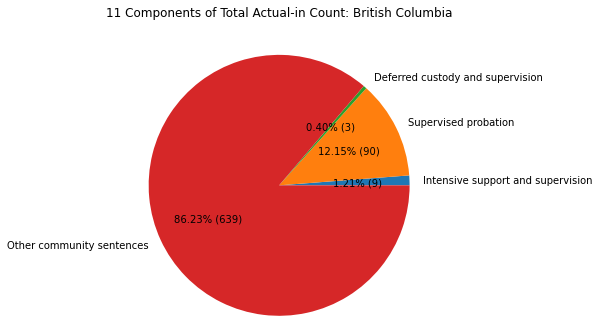

--------------------------------------------------------
12 No data of Yukon!
[0.0, 2.0, 2.0, 0.0]
--------------------------------------------------------
--------------------------------------------------------
13 No data of Northwest Territories!
[0.0, 3.0, 0.0, 0.0001]
--------------------------------------------------------
--------------------------------------------------------
14 No data of Nunavut!
[0.0001, 0.0001, 0.0001, 0.0001]
--------------------------------------------------------


In [138]:
'''
2021/2022, all geo, use pie to visualize the components of "Total community sentences"
'''
date_feature = '2021/2022'
plotCount(geo_features,date_feature)